Praktikum PCD 7 - Filter Batas

Import Library

In [1]:
import matplotlib.pyplot as plt #Mengimpor modul pyplot dari matplotlib untuk membuat plot dan visualisasi data. Alihkan modul ini dengan alias plt
%matplotlib inline

from skimage import data #Mengimpor modul data dari paket skimage (scikit-image)
from skimage.io import imread #Mengimpor fungsi imread dari modul io di skimage
from skimage.color import rgb2gray #Mengimpor fungsi rgb2gray dari modul color di skimage
import numpy as np #Mengimpor modul numpy dengan alias np

Load & Plot Input Image

Shape citra 1 :  (312, 250)
Shape citra 1 :  (252, 250)


Text(0.5, 1.0, 'Citra 2')

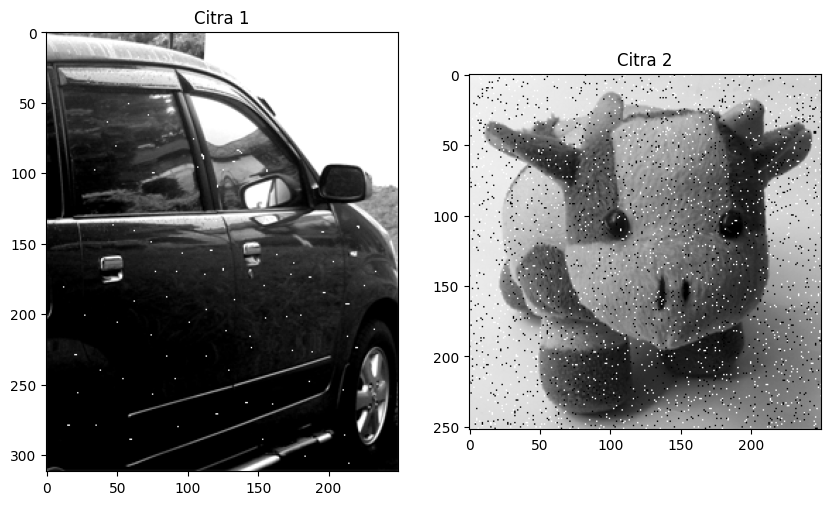

In [2]:
# Membaca citra menggunakan imread
citra1 = imread(fname="mobil.tif")
citra2 = imread(fname="boneka2.tif")

#Menampilkan dimensi citra pertama dan kedua menggunakan atribut shape
print('Shape citra 1 : ', citra1.shape)
print('Shape citra 1 : ', citra2.shape)

#Membuat sebuah figure dengan satu baris dan dua kolom
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

#Menampilkan citra pertama pada sumbu pertama dengan imshow()
ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Citra 1")

#Menampilkan citra kedua pada sumbu kedua dengan imshow()
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Citra 2")

Code Asal Matlab

In [3]:
#for baris=2 : tinggi-1
#    for kolom=2 : lebar-1
#        minPiksel = min([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1) ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);
#        
#        maksPiksel = max([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1)    ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);    
#            
#        if F(baris, kolom) < minPiksel
#           G(baris, kolom) = minPiksel;
#        else
#            if F(baris, kolom) > maksPiksel
#                G(baris, kolom) = maksPiksel;
#            else
#                G(baris, kolom) = F(baris, kolom);
#            end
#        end    
#    end
#end

Menyiapkan variable output

In [4]:
# Membuat salinan dari citra 1 dan citra 2
copyCitra1 = citra1.copy()
copyCitra2 = citra2.copy()

# Mendapatkan dimensi dari salinan citra 1 dan citra 2
m1,n1 = copyCitra1.shape
output1 = np.empty([m1, n1])

m2,n2 = copyCitra2.shape
output2 = np.empty([m2, n2])

# Menampilkan shape dari salinan citra 1 dan output citra 1
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)

print('m1 : ',m1)
print('n1 : ',n1)
print()

# Menampilkan shape dari salinan citra 2 dan output citra 2
print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 3 : ', output2.shape)
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (312, 250)
Shape output citra 1 :  (312, 250)
m1 :  312
n1 :  250

Shape copy citra 2 :  (252, 250)
Shape output citra 3 :  (252, 250)
m2 :  252
n2 :  250



Proses Filter Batas Pada Citra Input 1

In [5]:
# Proses filter penyeimbang dinamis pada citra 1
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        
        a1 = baris
        b1 = kolom
        
        arr = np.array([copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1, b1+1], \
            copyCitra1[a1, b1-1], copyCitra1[a1, b1+1], copyCitra1[a1+1, b1-1],  \
            copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]])
        
        minPiksel = np.amin(arr);        
        maksPiksel = np.amax(arr);    
            
        if copyCitra1[baris, kolom] < minPiksel :
            output1[baris, kolom] = minPiksel
        else :
            if copyCitra1[baris, kolom] > maksPiksel :
                output1[baris, kolom] = maksPiksel
            else :
                output1[baris, kolom] = copyCitra1[baris, kolom]

Proses Filter Batas Pada Citra Input 2

In [6]:
# Proses filter penyeimbang dinamis pada citra 2
for baris1 in range(0, m2-1):
    for kolom1 in range(0, n2-1):
        
        a1 = baris1
        b1 = kolom1
        
        arr = np.array([copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1, b1+1], \
            copyCitra2[a1, b1-1], copyCitra2[a1, b1+1], copyCitra2[a1+1, b1-1],  \
            copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]])
        
        minPiksel = np.amin(arr);        
        maksPiksel = np.amax(arr);    
            
        if copyCitra2[baris1, kolom1] < minPiksel :
            output2[baris1, kolom1] = minPiksel
        else :
            if copyCitra2[baris1, kolom1] > maksPiksel :
                output2[baris1, kolom1] = maksPiksel
            else :
                output2[baris1, kolom1] = copyCitra2[baris1, kolom1]

Plot Citra Input dan Output Hasil dari Filter Batas

Text(0.5, 1.0, 'Output Citra 2')

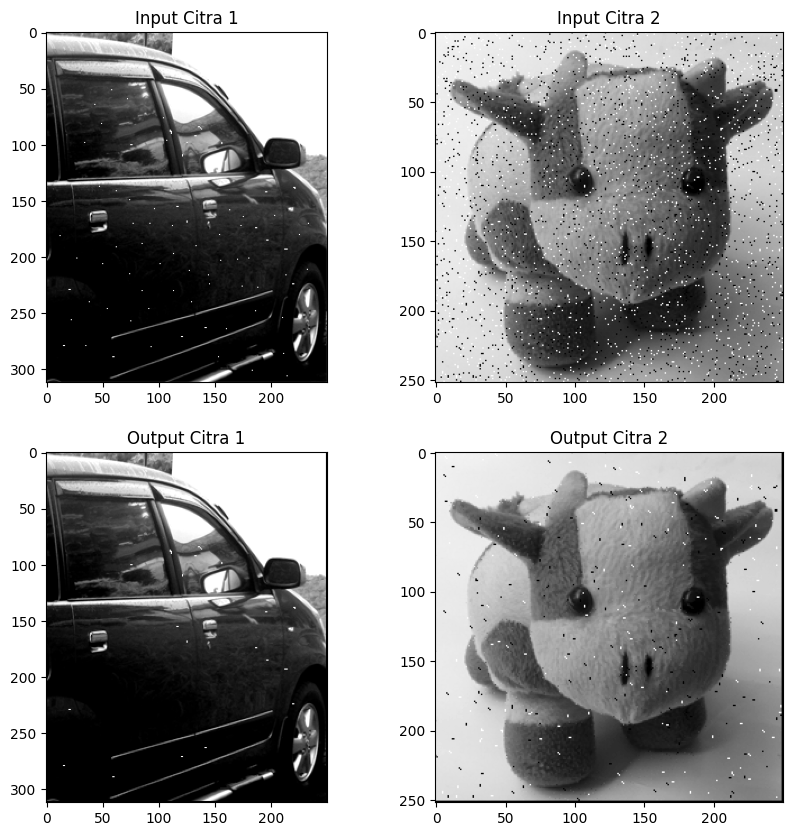

In [7]:
# Menampilkan citra output
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Input Citra 1")

ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Input Citra 2")

ax[2].imshow(output1, cmap = 'gray')
ax[2].set_title("Output Citra 1")

ax[3].imshow(output2, cmap = 'gray')
ax[3].set_title("Output Citra 2")